In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

N_POINTS = 500

Sine wave

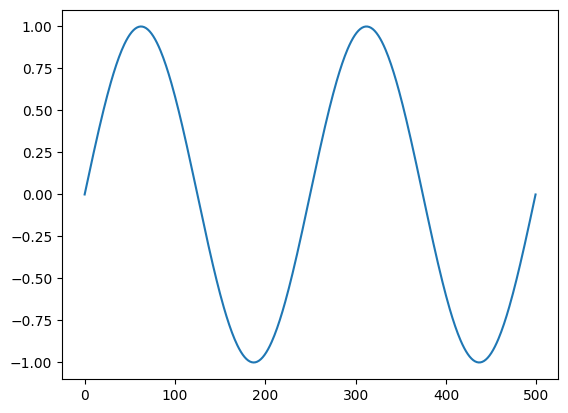

(1, 500)


In [2]:
def generate_sine(number):
    cycles = np.linspace(2, 20, number)
    lengths = np.pi * 2 * cycles
    dataset = np.sin([np.linspace(0, length, N_POINTS) for length in lengths])
    return dataset

sine_dataset = generate_sine(1)
plt.plot(sine_dataset[0])
plt.show()
print(sine_dataset.shape)

Triangle wave

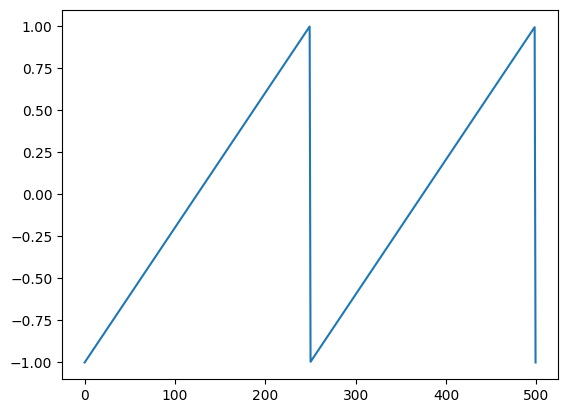

(1, 500)


In [3]:
def generate_triangle(number):
    params = np.linspace(2, 20, number)
    dataset = np.array([signal.sawtooth(2 * np.pi * param * np.linspace(0, 1, N_POINTS)) for param in params])
    return dataset

triangle_dataset = generate_triangle(1)
plt.plot(triangle_dataset[0])
plt.show()
print(triangle_dataset.shape)

Rectangle wave

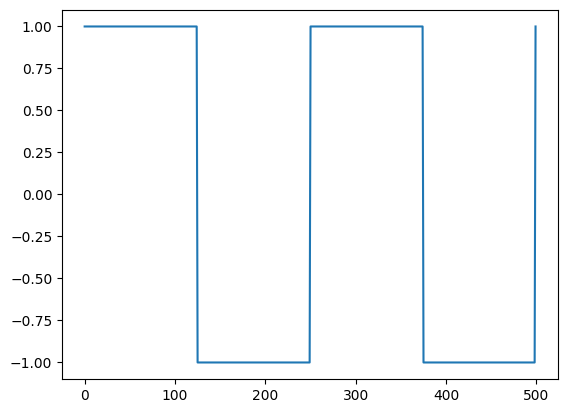

(1, 500)


In [4]:
def generate_rectangle(number):
    params = np.linspace(2, 20, number)
    dataset = np.array([signal.square(2 * np.pi * param * np.linspace(0, 1, N_POINTS)) for param in params])
    return dataset

rectangle_dataset = generate_rectangle(1)
plt.plot(rectangle_dataset[0])
plt.show()
print(rectangle_dataset.shape)

Gauss pulse

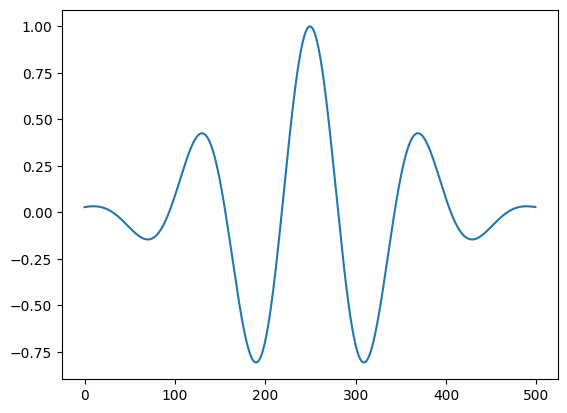

(1, 500)


In [5]:
def generate_gauss(number):
    params = np.linspace(2, 20, number)
    dataset = np.array([signal.gausspulse(np.linspace(-1, 1, N_POINTS), fc=param, retquad=True, retenv=True)[0] for param in params])
    return dataset

gauss_dataset = generate_gauss(1)
plt.plot(gauss_dataset[0])
plt.show()
print(gauss_dataset.shape)

Creating dataset

In [6]:
from sklearn.model_selection import train_test_split

N_DATA = 1000

id_to_type = {0: 'sine', 1: 'triangle', 2: 'rectangle', 3: 'gauss'}
type_to_id = {value: key for key, value in id_to_type.items()}

def generate_dataset(number):
    sine_dataset = generate_sine(number)
    triangle_dataset = generate_triangle(number)
    rectangle_dataset = generate_rectangle(number)
    gauss_dataset = generate_gauss(number)

    X = np.concatenate((sine_dataset, triangle_dataset, rectangle_dataset, gauss_dataset))
    y = np.concatenate(([type_to_id['sine']] * number, [type_to_id['triangle']] * number, [type_to_id['rectangle']] * number, [type_to_id['gauss']] * number))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generate_dataset(N_DATA)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 500), (800, 500), (3200,), (800,))

Training

In [7]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [8]:
clf.score(X_test, y_test)

1.0

Prediction

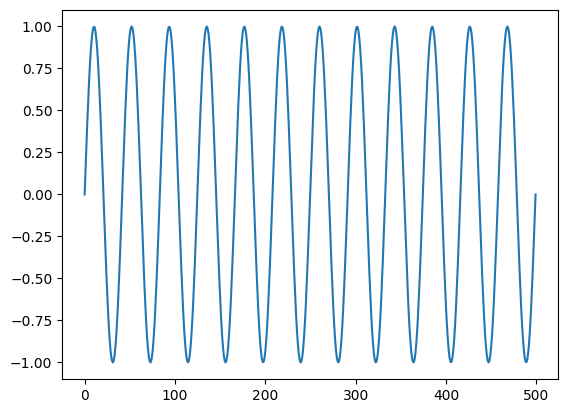

Model prediction: sine


In [9]:
sample = generate_sine(10)[5]
plt.plot(sample)
plt.show()
print(f'Model prediction: {id_to_type[clf.predict([sample])[0]]}')

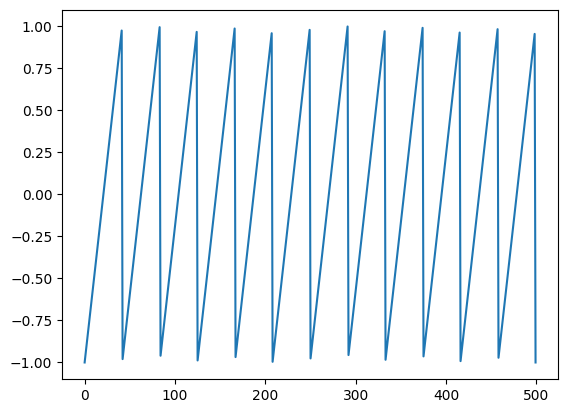

Model prediction: triangle


In [10]:
sample = generate_triangle(10)[5]
plt.plot(sample)
plt.show()
print(f'Model prediction: {id_to_type[clf.predict([sample])[0]]}')

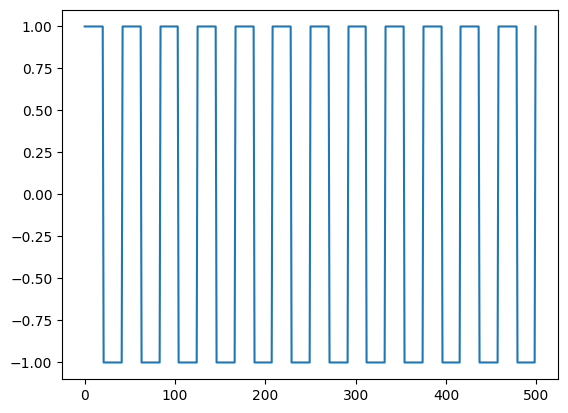

Model prediction: rectangle


In [11]:
sample = generate_rectangle(10)[5]
plt.plot(sample)
plt.show()
print(f'Model prediction: {id_to_type[clf.predict([sample])[0]]}')

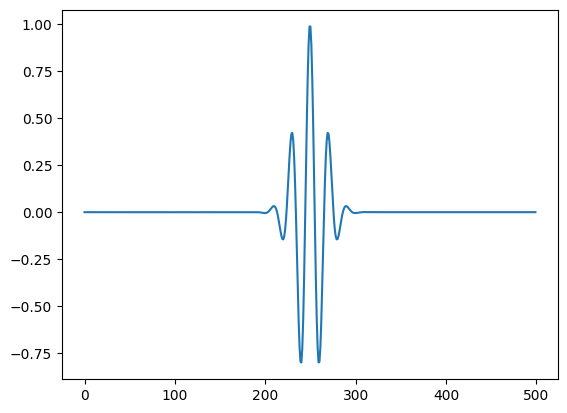

Model prediction: gauss


In [12]:
sample = generate_gauss(10)[5]
plt.plot(sample)
plt.show()
print(f'Model prediction: {id_to_type[clf.predict([sample])[0]]}')